In [66]:
import pandas as pd
import seaborn as sns
import sklearn.model_selection as sk

In [67]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
df.drop(columns=['Cabin', 'Name', 'PassengerId', 'Embarked', 'Ticket'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [70]:
for name in ['Age']:
    df[name].fillna(df[name].median(), inplace=True)
df

C:\Users\artem\AppData\Local\Temp\ipykernel_20012\163283244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[name].fillna(df[name].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,28.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [71]:
# frequent_pl = df['Embarked'].value_counts().head(1).index.name
# df['Embarked'].fillna(frequent_pl, inplace=True)
# df

In [72]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [73]:
df['Sex'].replace('male', 0, inplace=True)
df['Sex'].replace('female', 1, inplace=True)

C:\Users\artem\AppData\Local\Temp\ipykernel_20012\1793097466.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace('male', 0, inplace=True)
C:\Users\artem\AppData\Local\Temp\ipykernel_20012\1793097466.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [74]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,28.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [75]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000


<Axes: >

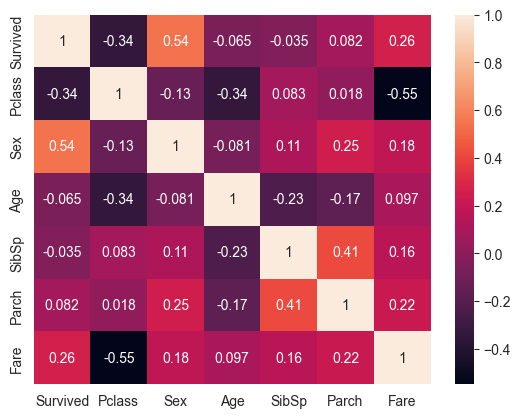

In [76]:
sns.heatmap(df.corr(),
            annot=True)

In [77]:
# Так как Fare связано с Pclass, можно убрать Fare

df.drop(columns=['Fare'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
...,...,...,...,...,...,...
886,0,2,0,27.0,0,0
887,1,1,1,19.0,0,0
888,0,3,1,28.0,1,2
889,1,1,0,26.0,0,0


<Axes: >

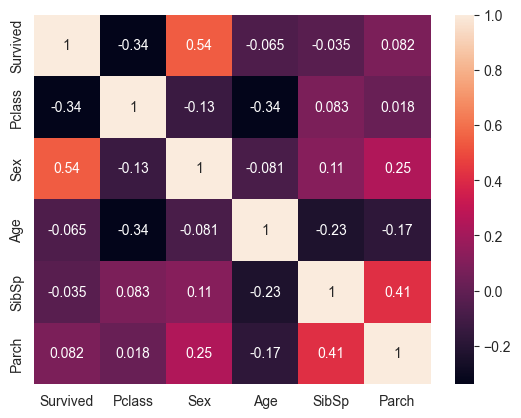

In [78]:
sns.heatmap(df.corr(),
            annot=True)

In [79]:
# Вырезаем Parch, SibSP и Age

# df.drop(columns=['SibSp', 'Parch', 'Age'], inplace=True)
# df

<Axes: >

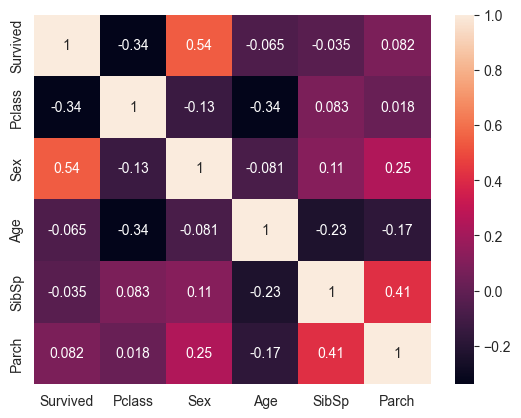

In [80]:
sns.heatmap(df.corr(),
            annot=True)

<Axes: >

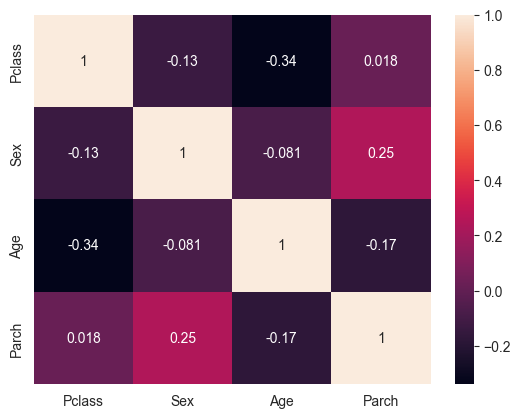

In [81]:
sns.heatmap(df.drop(columns=['Survived', 'SibSp']).corr(),
            annot=True)

In [82]:
len(df)

891

In [83]:
for f in df.columns:
    df[f] = df[f].map(lambda x: (x - min(df[f])) / (max(df[f]) - min(df[f])))

df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,1.0,0.0,0.271174,0.125,0.000000
1,1.0,0.0,1.0,0.472229,0.125,0.000000
2,1.0,1.0,1.0,0.321438,0.000,0.000000
3,1.0,0.0,1.0,0.434531,0.125,0.000000
4,0.0,1.0,0.0,0.434531,0.000,0.000000
...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000
887,1.0,0.0,1.0,0.233476,0.000,0.000000
888,0.0,1.0,1.0,0.346569,0.125,0.333333
889,1.0,0.0,0.0,0.321438,0.000,0.000000


In [84]:
df_sample, df_test = sk.train_test_split(df, test_size=0.3, train_size=0.7)

df_test

,Survived,Pclass,Sex,Age,SibSp,Parch
586,0.0,0.5,0.0,0.585323,0.000,0.000000
538,0.0,1.0,0.0,0.346569,0.000,0.000000
283,1.0,1.0,0.0,0.233476,0.000,0.000000
319,1.0,0.0,1.0,0.497361,0.125,0.166667
201,0.0,1.0,0.0,0.346569,1.000,0.333333
...,...,...,...,...,...,...
691,1.0,1.0,1.0,0.044986,0.000,0.166667
294,0.0,1.0,0.0,0.296306,0.000,0.000000
433,0.0,1.0,0.0,0.208344,0.000,0.000000
387,1.0,0.5,1.0,0.447097,0.000,0.000000


In [85]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.metrics import r2_score
from numpy import array

In [86]:
survive_coef = 0.5

# Линейная регрессия

In [87]:
LinReg = LinearRegression()
LinReg.fit(df_sample.iloc[:, 1:], df_sample.iloc[:, 0])

LinearRegression()

In [88]:
LinReg.coef_

array([-0.36137075,  0.53735749, -0.48501079, -0.42451716,  0.03167676])

In [89]:
LinRes = LinReg.predict(df_test.iloc[:, 1:])

In [90]:
LinRes, array(LinRes) > survive_coef, r2_score(df_test.iloc[:, 0], LinRes)

(array([ 1.67462829e-01,  1.02575457e-01,  1.57427142e-01,  8.80382924e-01,
        -3.11382787e-01,  1.63521774e-01,  9.05576623e-01,  1.26953984e-01,
         2.43171130e-02,  7.13068522e-01,  2.05817659e-01,  7.73648302e-01,
         4.63946204e-01,  5.06134994e-03,  1.51332510e-01,  8.26712948e-01,
         7.60195232e-01,  1.38484771e-01,  6.86536419e-01,  2.83260831e-01,
         2.88988925e-01,  3.87841437e-01,  1.01349295e+00,  1.20859352e-01,
         6.95817462e-02,  2.17191750e-01,  1.44871342e-01,  5.27125581e-01,
         8.15046917e-01,  6.60076668e-02,  1.51332510e-01,  5.25049218e-01,
         7.38418917e-01,  1.02575457e-01,  2.95450094e-01,  7.17357615e-02,
         9.63105556e-01,  4.10881559e-01,  1.02575457e-01,  8.67221793e-01,
         9.64808252e-02,  7.21022984e-02,  8.87659264e-01,  9.48239044e-01,
         1.11725839e+00,  3.05485781e-01,  9.05576623e-01, -2.54118085e-02,
         7.77955894e-01,  1.45237879e-01,  9.03861935e-02,  9.89114426e-01,
         8.2

# Логистическая

In [92]:
LogReg = LogisticRegression()

LogReg.fit(df_sample.iloc[:, 1:], df_sample.iloc[:, 0])

LogisticRegression()

In [93]:
LogReg.coef_

array([[-2.00446032,  2.66402306, -1.95172195, -1.42648033, -0.05613739]])

In [94]:
LogRes = LogReg.predict(df_test.iloc[:, 1:])

In [95]:
LogRes, array(LogRes) > survive_coef, r2_score(df_test.iloc[:, 0], LogRes)

(array([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        1., 

# Лассо

In [96]:
Las = Lasso(alpha=0.0001)
Las.fit(df_sample.iloc[:, 1:], df_sample.iloc[:, 0])

Lasso(alpha=0.0001)

In [97]:
Las.coef_

array([-0.36022954,  0.53745169, -0.47966644, -0.41292838,  0.01965524])

In [98]:
LasRes = Las.predict(df_test.iloc[:, 1:])

In [99]:
LasRes, array(LasRes) > survive_coef, r2_score(df_test.iloc[:, 0], LasRes)

(array([ 1.68333222e-01,  1.02740474e-01,  1.56987747e-01,  8.79751830e-01,
        -3.03636156e-01,  1.63015222e-01,  9.06613331e-01,  1.26850373e-01,
         2.42629263e-02,  7.12521861e-01,  2.07129297e-01,  7.74718361e-01,
         4.62970012e-01,  6.30087769e-03,  1.50960272e-01,  8.26334408e-01,
         7.55238456e-01,  1.33281744e-01,  6.87702488e-01,  2.82855243e-01,
         2.90804469e-01,  3.85201938e-01,  1.01247665e+00,  1.20822898e-01,
         7.18380774e-02,  2.16432645e-01,  1.46854549e-01,  5.17819234e-01,
         8.09485729e-01,  6.65756255e-02,  1.50960272e-01,  5.20372782e-01,
         7.36511385e-01,  1.02740474e-01,  2.94910193e-01,  7.45248517e-02,
         9.58753650e-01,  4.11353965e-01,  1.02740474e-01,  8.67817257e-01,
         9.67129994e-02,  7.26031003e-02,  8.86609156e-01,  9.48805655e-01,
         1.11207175e+00,  3.06255668e-01,  9.06613331e-01, -2.38364962e-02,
         7.78114610e-01,  1.44932798e-01,  9.06855246e-02,  9.88366752e-01,
         8.2